In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
grtn = pd.read_excel('./2019/Actual_generation_2019.xlsx')

grtn = grtn.dropna()
grtn.head()

,Data category: Actual generation,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
5,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
6,"Jan 1, 2019",12:00 AM,1231.5,401,794.75,4751,0,27.5,2250.5,1733,836,851,29.5,341
7,"Jan 1, 2019",12:15 AM,1234.25,394.75,794,4937.25,0,27.5,2263.25,1588,730,822,80,339
8,"Jan 1, 2019",12:30 AM,1231.5,381.25,792.25,5118.5,0,27.5,2246,1555,649,805,29,341
9,"Jan 1, 2019",12:45 AM,1233.5,381,755.5,5188.75,0,27.5,2241.75,1459,598,797,29.25,341


In [4]:

#Update Column Headings with right information on row 2 and delete this row in the dataframe
grtn.columns = grtn.iloc[0]
grtn = grtn.drop(grtn.index[0])

grtn.head()



5,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
6,"Jan 1, 2019",12:00 AM,1231.5,401,794.75,4751,0,27.5,2250.5,1733,836,851,29.5,341
7,"Jan 1, 2019",12:15 AM,1234.25,394.75,794,4937.25,0,27.5,2263.25,1588,730,822,80,339
8,"Jan 1, 2019",12:30 AM,1231.5,381.25,792.25,5118.5,0,27.5,2246,1555,649,805,29,341
9,"Jan 1, 2019",12:45 AM,1233.5,381,755.5,5188.75,0,27.5,2241.75,1459,598,797,29.25,341
10,"Jan 1, 2019",1:00 AM,1229,388.25,715.5,5297.5,0,27.5,2224.5,1368,611,766,29,339


In [5]:
#Merge the date and time columns, turn them to DateTime format and set to DateTime index


grtn['DateTime'] = grtn['Date'] + ' ' + grtn['Time of day']

grtn['DateTime'] = pd.to_datetime(grtn['DateTime'])

grtn = grtn.drop(['Date','Time of day'], axis=1)
grtn.head()



5,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh],DateTime
6,1231.5,401,794.75,4751,0,27.5,2250.5,1733,836,851,29.5,341,2019-01-01 00:00:00
7,1234.25,394.75,794,4937.25,0,27.5,2263.25,1588,730,822,80,339,2019-01-01 00:15:00
8,1231.5,381.25,792.25,5118.5,0,27.5,2246,1555,649,805,29,341,2019-01-01 00:30:00
9,1233.5,381,755.5,5188.75,0,27.5,2241.75,1459,598,797,29.25,341,2019-01-01 00:45:00
10,1229,388.25,715.5,5297.5,0,27.5,2224.5,1368,611,766,29,339,2019-01-01 01:00:00


In [6]:
grtn = grtn.set_index(grtn['DateTime'])


grtn.head()


5,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh],DateTime
DateTime,,,,,,,,,,,,,
2019-01-01 00:00:00,1231.5,401,794.75,4751,0,27.5,2250.5,1733,836,851,29.5,341,2019-01-01 00:00:00
2019-01-01 00:15:00,1234.25,394.75,794,4937.25,0,27.5,2263.25,1588,730,822,80,339,2019-01-01 00:15:00
2019-01-01 00:30:00,1231.5,381.25,792.25,5118.5,0,27.5,2246,1555,649,805,29,341,2019-01-01 00:30:00
2019-01-01 00:45:00,1233.5,381,755.5,5188.75,0,27.5,2241.75,1459,598,797,29.25,341,2019-01-01 00:45:00
2019-01-01 01:00:00,1229,388.25,715.5,5297.5,0,27.5,2224.5,1368,611,766,29,339,2019-01-01 01:00:00


In [7]:
#Converting data into hourly timestep from quarterhourly
grtn_hr = grtn.resample('H').sum()/4

grtn_hr.head()

5,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
DateTime,,,,,,,,,,,
2019-01-01 00:00:00,1232.6875,389.5000,784.1250,0.0,27.5,2250.3750,1583.75,703.25,818.75,41.9375,340.50
2019-01-01 01:00:00,1226.0000,388.4375,717.0000,0.0,27.5,2133.8125,1345.00,601.25,742.00,29.0000,330.25
2019-01-01 02:00:00,1216.6250,377.7500,614.8750,0.0,27.5,1988.5000,1335.75,557.25,680.25,21.9375,316.00
2019-01-01 03:00:00,1216.4375,373.6875,674.4375,0.0,27.5,1805.4375,1317.75,589.25,663.25,0.2500,313.50
2019-01-01 04:00:00,1216.8125,364.5625,644.5625,0.0,27.5,1780.0000,1294.75,577.00,676.75,0.2500,315.25


### CONSUMPTION DATA - Data Cleaning

#### Reading Excel file into DataFrame, dropping NaN values and setting the heading right

In [8]:
#Read Excel file and drop NAN values
csptn = pd.read_excel('./2019/Actual_consumption_2019.xlsx')
csptn = csptn.dropna()

#Set the right heading
csptn.columns = csptn.iloc[0]
csptn = csptn.drop(csptn.index[0])

csptn.head()

5,Date,Time of day,Total[MWh],Residual load[MWh]
6,"Jan 1, 2019",12:00 AM,10792,-
7,"Jan 1, 2019",12:15 AM,10788,-
8,"Jan 1, 2019",12:30 AM,10707,-
9,"Jan 1, 2019",12:45 AM,10690,-
10,"Jan 1, 2019",1:00 AM,10564,-


#### Merging the Date and Time Columns, convert them to DateTime format and drop the original date and time columns

In [9]:
csptn['DateTime'] = csptn['Date'] + ' ' + csptn['Time of day']

csptn['DateTime'] = pd.to_datetime(csptn['DateTime'])

csptn = csptn.drop(['Date','Time of day', 'Residual load[MWh]'], axis=1)
csptn.head()

5,Total[MWh],DateTime
6,10792,2019-01-01 00:00:00
7,10788,2019-01-01 00:15:00
8,10707,2019-01-01 00:30:00
9,10690,2019-01-01 00:45:00
10,10564,2019-01-01 01:00:00


#### Setting DateTime Column as Index

In [10]:
csptn= csptn.set_index(csptn['DateTime'])

csptn.head()


5,Total[MWh],DateTime
DateTime,,
2019-01-01 00:00:00,10792,2019-01-01 00:00:00
2019-01-01 00:15:00,10788,2019-01-01 00:15:00
2019-01-01 00:30:00,10707,2019-01-01 00:30:00
2019-01-01 00:45:00,10690,2019-01-01 00:45:00
2019-01-01 01:00:00,10564,2019-01-01 01:00:00


#### Set consumption data to hourly time step from quarterhourly time step

In [314]:
csptn_hr = csptn.resample('H').sum()/4

csptn_hr = csptn_hr.drop('DateTime', axis=1)

csptn_hr.head()

5,Total[MWh]
DateTime,
2019-01-01 00:00:00,10744.25
2019-01-01 01:00:00,10390.50
2019-01-01 02:00:00,10025.00
2019-01-01 03:00:00,9721.00
2019-01-01 04:00:00,9701.50


### DATA ANALYSIS

#### What hour of which day of the year  2019 was Peak Energy Consumption Experienced and what was it?

In [68]:
print(csptn_hr['Total[MWh]'].idxmax().day_name())
csptn_hr['Total[MWh]'].idxmax()

2019-02-07 11:00:00


'Thursday'

In [315]:
#The amount of energy consumed at the peak hour of the year 2019

print(csptn_hr.loc['2019-02-07 11:00:00'])

5
Total[MWh]    19077.75
Name: 2019-02-07 11:00:00, dtype: float64


#### What day and month were the highest  and lowest for energy consumption in 2019

In [63]:
csptn_hr.resample('D').sum().idxmax()

5
Total[MWh]   2019-01-23
dtype: datetime64[ns]

In [87]:
csptn_hr.resample('D').sum().idxmin()

5
Total[MWh]   2019-04-21
dtype: datetime64[ns]

#### The Load Profile on the lowest and highest consumption days

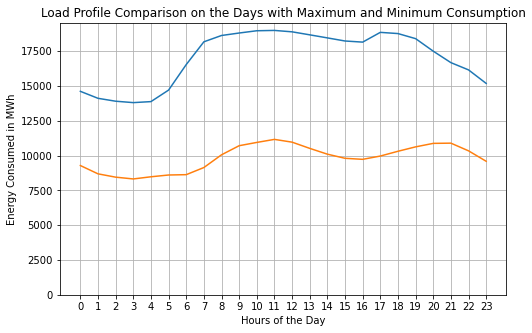

In [320]:
plt.figure(figsize = (8,5))
plt.plot(csptn_hr.loc['2019-01-23'].index.hour, csptn_hr.loc['2019-01-23']['Total[MWh]'])
plt.plot(csptn_hr.loc['2019-04-21'].index.hour, csptn_hr.loc['2019-04-21']['Total[MWh]'])

plt.ylim(ymin=0)
plt.xlabel('Hours of the Day')
plt.ylabel('Energy Consumed in MWh')
plt.title('Load Profile Comparison on the Days with Maximum and Minimum Consumption')
plt.xticks(csptn_hr.loc['2019-01-23'].index.hour)
plt.grid()

#### Comparison of Monthly Total Energy Consumptions(MWh) from January to December

<function matplotlib.pyplot.show(*args, **kw)>

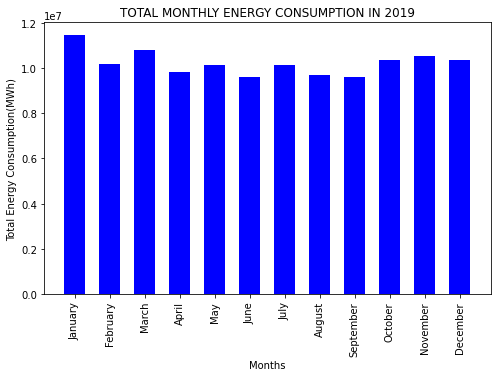

In [230]:
csptn_mnt = csptn_hr.resample('M').sum()

csptn_mnt.index = csptn_mnt.index.month_name()


plt.figure(figsize=(8,5))
plt.bar(csptn_mnt.index, csptn_mnt['Total[MWh]'], width=0.6, color='b')

plt.title('TOTAL MONTHLY ENERGY CONSUMPTION IN 2019')
plt.ylabel('Total Energy Consumption(MWh)')
plt.xlabel('Months')
plt.xticks(rotation='vertical')

plt.show

#### Average Load Profile for Typical Day in the Summer and Winter

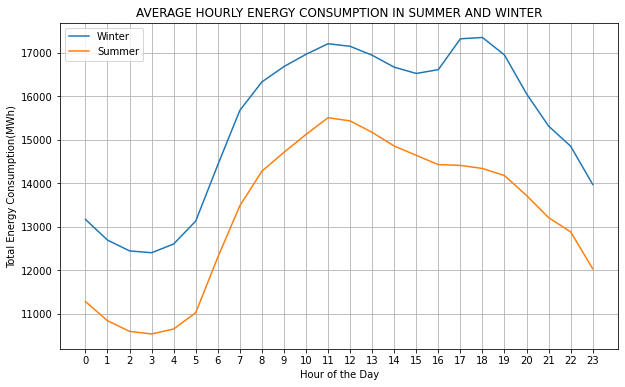

In [176]:
#a = csptn_hr.groupby([csptn_hr.index.month, csptn_hr.index.hour]).mean()
#a.loc['2019-01']

a = csptn_hr['2019-01'].groupby(csptn_hr['2019-01'].index.hour).mean()
b = csptn_hr['2019-06'].groupby(csptn_hr['2019-06'].index.hour).mean()

plt.figure(figsize=(10,6))
plt.plot(a)
plt.plot(b)
plt.title('AVERAGE HOURLY ENERGY CONSUMPTION IN SUMMER AND WINTER')
plt.ylabel('Total Energy Consumption(MWh)')
plt.xlabel('Hour of the Day')
plt.legend(('Winter', 'Summer'), loc=2)
plt.xticks(a.index)
#plt.ylim(ymin=0)
plt.grid()

#### Load Profile through a Month in the Summer and Winter

<function matplotlib.pyplot.show(*args, **kw)>

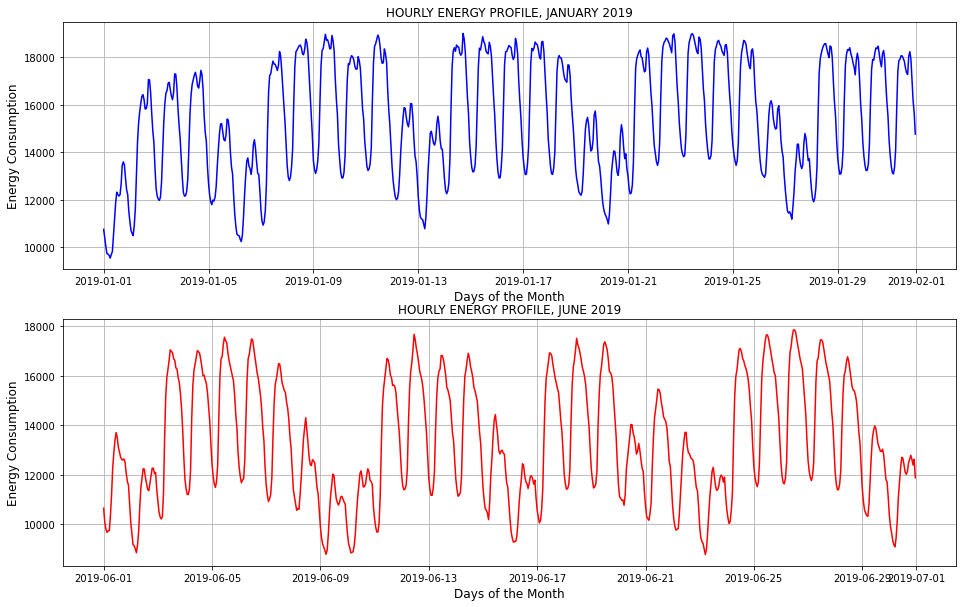

In [245]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,10))

ax1.plot(csptn_hr.loc['2019-01'].index, csptn_hr.loc['2019-01']['Total[MWh]'], 'b')
ax1.set_xlabel('Days of the Month', size=12)
ax1.set_ylabel('Energy Consumption', size=12)
ax1.set_title('HOURLY ENERGY PROFILE, JANUARY 2019')
ax1.grid()

ax2.plot(csptn_hr.loc['2019-06'].index, csptn_hr.loc['2019-06']['Total[MWh]'], 'r')
ax2.set_xlabel('Days of the Month', size=12)
ax2.set_ylabel('Energy Consumption', size=12)
ax2.set_title('HOURLY ENERGY PROFILE, JUNE 2019')
ax2.grid()

plt.show

### POWER GENERATION ANALYSIS

#### TOTAL ENERGY PRODUCED BY EACH TECHNOLOGY IN 2019

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

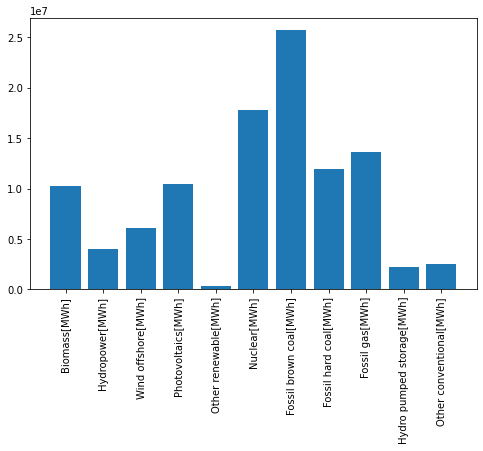

In [248]:
tot_energy = grtn_hr.sum()

plt.figure(figsize=(8,5))
plt.bar(tot_energy.index, tot_energy)

plt.xticks(rotation='vertical')


#### TOTAL ENERGY PRODUCED BY EACH TECHNOLOGY EVERY MONTH

In [298]:
tot_grtn_month = grtn_hr.resample('M').sum()

tot_grtn_month.index = tot_grtn_month.index.month_name()


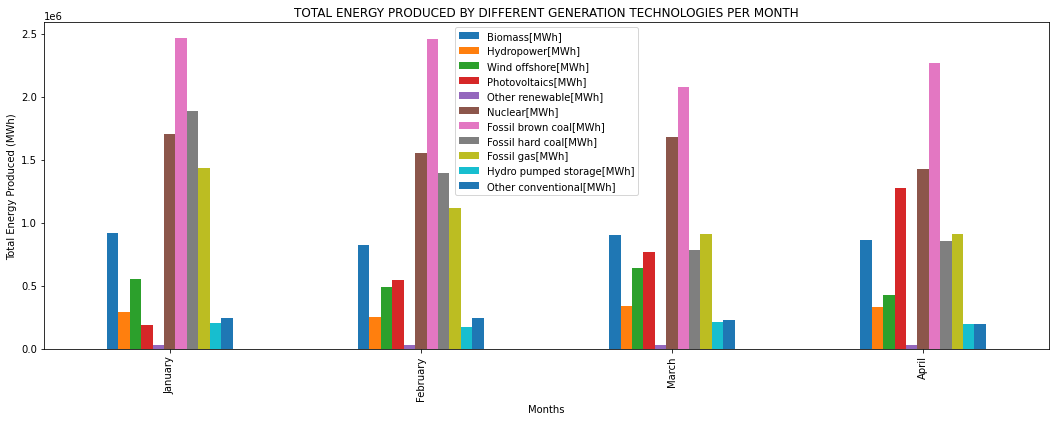

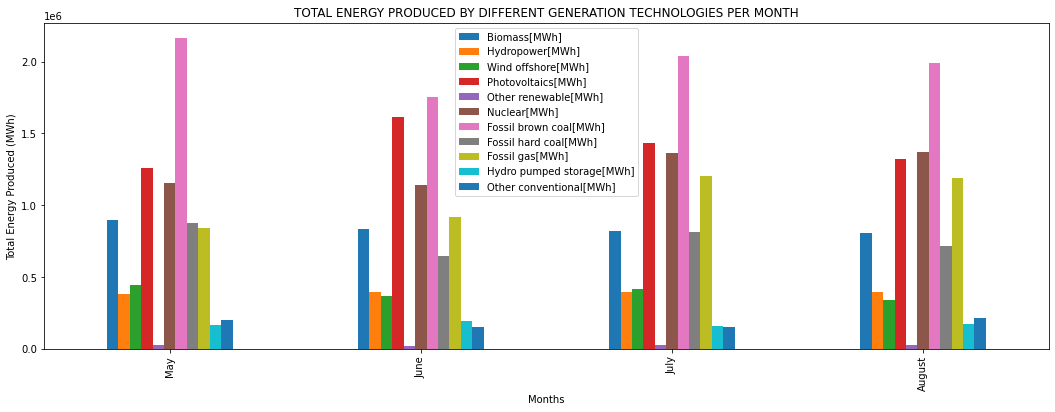

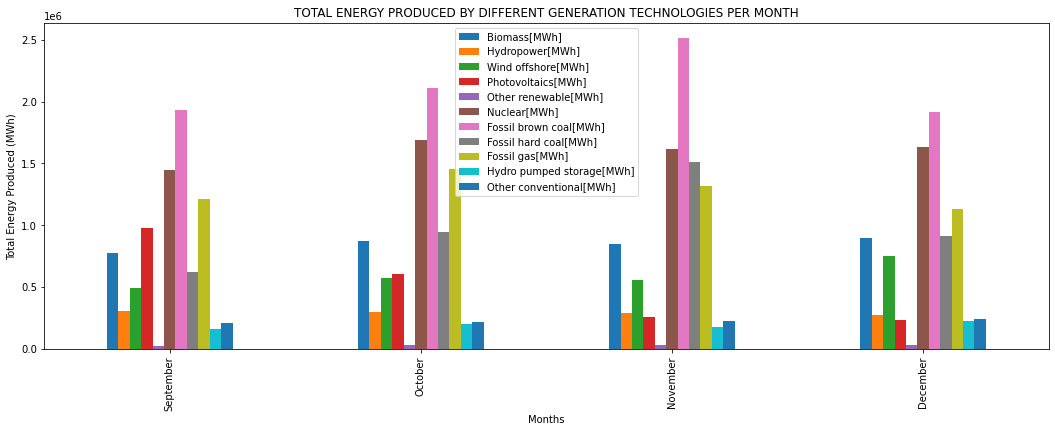

In [313]:
tot_grtn_month
tot_grtn_month['January':'April'].plot(kind='bar', figsize=(18,6))

plt.xlabel('Months')
plt.ylabel('Total Energy Produced (MWh)')
plt.title('TOTAL ENERGY PRODUCED BY DIFFERENT GENERATION TECHNOLOGIES PER MONTH')
plt.legend(loc=0)

tot_grtn_month['May':'August'].plot(kind='bar', figsize=(18,6))

plt.xlabel('Months')
plt.ylabel('Total Energy Produced (MWh)')
plt.title('TOTAL ENERGY PRODUCED BY DIFFERENT GENERATION TECHNOLOGIES PER MONTH')
plt.legend(loc=0)

tot_grtn_month['September':'December'].plot(kind='bar', figsize=(18,6))

plt.xlabel('Months')
plt.ylabel('Total Energy Produced (MWh)')
plt.title('TOTAL ENERGY PRODUCED BY DIFFERENT GENERATION TECHNOLOGIES PER MONTH')
plt.legend(loc=0)

#plt.show()


#### Generation From Renewable Energy Sources

In [374]:
ren_grtn = grtn_hr[['Biomass[MWh]', 'Hydropower[MWh]', 'Wind offshore[MWh]', 'Photovoltaics[MWh]', 'Other renewable[MWh]']]

ren_grtn['Total Renewables[MWh]'] = ren_grtn['Biomass[MWh]']+ren_grtn['Hydropower[MWh]']+ren_grtn['Wind offshore[MWh]']+ren_grtn['Photovoltaics[MWh]']+ ren_grtn['Other renewable[MWh]']

ren_grtn['Total Consumption'] = csptn_hr['Total[MWh]']

ren_grtn= ren_grtn.drop(['Biomass[MWh]', 'Hydropower[MWh]', 'Wind offshore[MWh]', 'Photovoltaics[MWh]', 'Other renewable[MWh]'], axis=1)

<ipython-input-374-bf61da3bb1b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ren_grtn['Total Renewables[MWh]'] = ren_grtn['Biomass[MWh]']+ren_grtn['Hydropower[MWh]']+ren_grtn['Wind offshore[MWh]']+ren_grtn['Photovoltaics[MWh]']+ ren_grtn['Other renewable[MWh]']
<ipython-input-374-bf61da3bb1b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ren_grtn['Total Consumption'] = csptn_hr['Total[MWh]']




#### Total daily renewable energy generation and percentage from the total consumption

In [391]:
ren_grtn_day = ren_grtn.resample('D').sum()

ren_grtn_day['perc Renewables'] = 100*(ren_grtn_day['Total Renewables[MWh]']/ren_grtn_day['Total Consumption'])

ren_grtn_day.head()

5,Total Renewables[MWh],Total Consumption,perc Renewables
DateTime,,,
2019-01-01,55128.1875,273872.25,20.129161
2019-01-02,65104.2500,345494.25,18.843801
2019-01-03,59943.9375,362139.75,16.552709
2019-01-04,63089.5000,366666.75,17.206223
2019-01-05,62337.7500,326817.75,19.074163


#### On which day did we have the highest percentage contribution of Renewables in the year

In [378]:
ren_grtn_day['perc Renewables'].idxmax()

Timestamp('2019-04-22 00:00:00', freq='D')

#### The Total Consumption and total generation from renewables on this day

In [380]:

ren_grtn_day.loc['2019-04-22']


5
Total Renewables[MWh]    122995.000000
Total Consumption        251036.500000
perc Renewables              48.994867
Name: 2019-04-22 00:00:00, dtype: float64

#### What does the share of renewable energy in our total energy consumtion look like

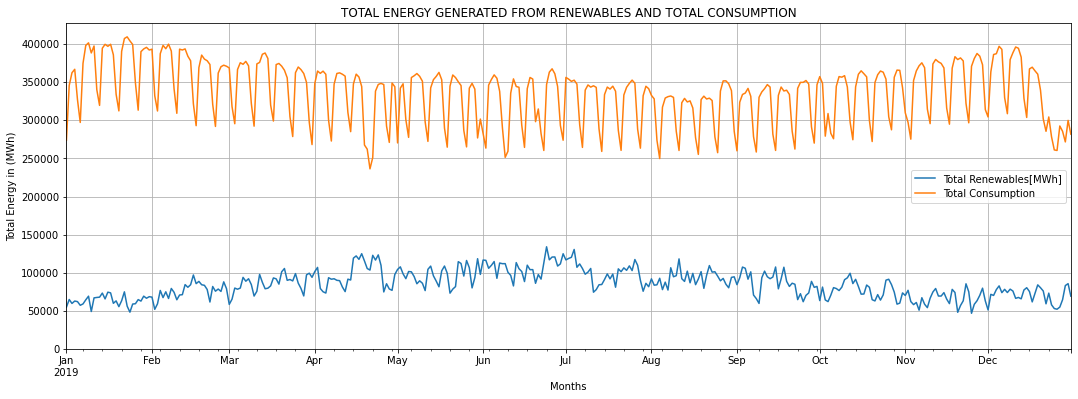

In [393]:
plt.figure(figsize=(18,6))

plt1 = ren_grtn_day['Total Renewables[MWh]'].plot()

plt6 = ren_grtn_day['Total Consumption'].plot()

plt.xlabel('Months')
plt.ylabel('Total Energy in (MWh)')
plt.title('TOTAL ENERGY GENERATED FROM RENEWABLES AND TOTAL CONSUMPTION')
plt.legend(loc=0)
plt.ylim(ymin=0)
plt.grid()

plt.show()

In [253]:
#grtn_hr['01:00:00']

In [130]:
# TO ASSESS THE DATA AT A PARTICULAR TIME ONLY ON EVERYDAY

#df["messageDate"] = pd.to_datetime(df["messageDate"])
#time_mask = (df['messageDate'].dt.hour >= 13) & \
#            (df['messageDate'].dt.hour <= 15)

grtn_hr[(grtn_hr.index.hour >= 1) & (grtn_hr.index.hour <= 6)]['2019-01']

5,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
DateTime,,,,,,,,,,,
2019-01-01 01:00:00,1226.0000,388.4375,717.0000,0.0,27.5000,2133.8125,1345.00,601.25,742.00,29.0000,330.25
2019-01-01 02:00:00,1216.6250,377.7500,614.8750,0.0,27.5000,1988.5000,1335.75,557.25,680.25,21.9375,316.00
2019-01-01 03:00:00,1216.4375,373.6875,674.4375,0.0,27.5000,1805.4375,1317.75,589.25,663.25,0.2500,313.50
2019-01-01 04:00:00,1216.8125,364.5625,644.5625,0.0,27.5000,1780.0000,1294.75,577.00,676.75,0.2500,315.25
2019-01-01 05:00:00,1214.9375,346.2500,594.6875,0.0,27.5000,1765.1875,1269.25,578.00,680.25,0.7500,317.00
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31 02:00:00,1212.2500,342.3750,537.3750,0.0,45.7500,2366.1250,3940.25,3106.50,2228.50,0.7500,322.00
2019-01-31 03:00:00,1211.3125,348.5625,523.7500,0.0,45.7500,2367.0000,3942.75,3239.25,2178.50,0.7500,341.50
2019-01-31 04:00:00,1212.6250,335.3125,532.9375,0.0,45.7500,2368.0625,3997.00,3331.50,2156.25,6.2500,339.75


In [135]:
#Getting average value over a specific hour over the year

grtn_hr.groupby([grtn_hr.index.month, grtn_hr.index.hour]).mean()



5                  Biomass[MWh]  Hydropower[MWh]  Wind offshore[MWh]  \
DateTime DateTime                                                      
1        0          1222.439516       384.957661          722.949597   
         1          1217.348790       380.822581          722.381048   
         2          1219.260081       379.540323          716.794355   
         3          1219.284274       379.955645          725.812500   
         4          1218.887097       379.774194          713.250000   
...                         ...              ...                 ...   
12       19         1223.008065       374.112903          992.387097   
         20         1221.685484       369.411290          976.298387   
         21         1220.588710       368.491935          971.427419   
         22         1216.483871       368.750000          988.241935   
         23         1213.806452       366.846774         1011.919355   

5                  Photovoltaics[MWh]  Other renewable[MWh]  Nuclear[MWh]  \
DateTime DateTime                                                           
1        0                        0.0             38.800403   2278.064516   
         1                        0.0             38.651210   2276.983871   
         2                        0.0             38.701613   2270.657258   
         3                        0.0             38.727823   2264.139113   
         4                        0.0             38.824597   2265.743952   
...                               ...                   ...           ...   
12       19                       0.0             48.959677   2221.161290   
         20                       0.0             48.790323   2209.491935   
         21                       0.0             48.491935   2208.209677   
         22                       0.0             47.661290   2212.064516   
         23                       0.0             46.846774   2202.879032   

5                  Fossil brown coal[MWh]  Fossil hard coal[MWh]  \
DateTime DateTime                                                  
1        0                    3103.693548            2097.862903   
         1                    3049.419355            2048.298387   
         2                    3042.701613            2037.016129   
         3                    3042.298387            2052.387097   
         4                    3060.596774            2088.145161   
...                                   ...                    ...   
12       19                   2842.459677            1399.370968   
         20                   2783.532258            1282.129032   
         21                   2670.040323            1171.475806   
         22                   2542.620968            1053.798387   
         23                   2330.677419             943.604839   

5                  Fossil gas[MWh]  Hydro pumped storage[MWh]  \
DateTime DateTime                                               
1        0             1565.290323                  17.516129   
         1             1546.338710                   9.229839   
         2             1538.532258                   4.290323   
         3             1540.322581                   3.788306   
         4             1574.169355                   7.002016   
...                            ...                        ...   
12       19            1738.741935                 597.346774   
         20            1611.451613                 381.298387   
         21            1494.419355                 226.870968   
         22            1381.717742                 202.798387   
         23            1247.661290                  93.790323   

5                  Other conventional[MWh]  
DateTime DateTime                           
1        0                      319.620968  
         1                      317.443548  
         2                      318.330645  
         3                      319.435484  
         4                      320.000000  
...            

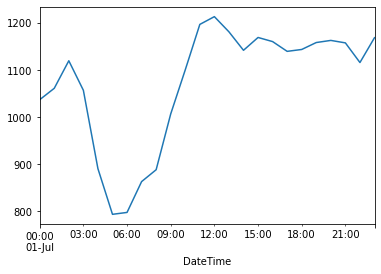

In [157]:
#WIND POWER GENERATION ON A TYPICAL DAY

grtn_hr['2019-07-01']['Wind offshore[MWh]'].plot()